In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import  train_test_split
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [2]:
!pip install spacy


[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("Resume.csv")

In [4]:
df

,Resumes,Category
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume
76,G Himaja\n\n ...,Workday resume
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [6]:
df.isnull()

,Resumes,Category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
74,False,False
75,False,False
76,False,False
77,False,False


In [7]:
df.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Checking unnecessary words in the Data

In [9]:
df.Resumes.str.contains('https://').value_counts()

False    72
True      7
Name: Resumes, dtype: int64

In [10]:
df.Resumes.str.contains('https://').value_counts() / len(df)

False    0.911392
True     0.088608
Name: Resumes, dtype: float64

In [11]:
df.Resumes.str.contains('@').value_counts()

False    76
True      3
Name: Resumes, dtype: int64

In [12]:
df.Resumes.str.contains('@').value_counts() / len(df)

False    0.962025
True     0.037975
Name: Resumes, dtype: float64

In [13]:
print('Total Resumes this period:', len(df.index))

Total Resumes this period: 79


In [14]:
from nltk import word_tokenize
tokens = df['Resumes'].map(word_tokenize)

In [15]:
tokens[0:30]

0     [Naveen, Sadhu, Title, :, software, developer,...
1     [Ui-Developer/, React, JS, Developer, NAME, :,...
2     [SUSOVAN, BAG, Seeking, a, challenging, positi...
3     [SHAIK, ABDUL, SHARUK, 2, years, ’, Experience...
4     [MD, KHIZARUDDIN, RAUF, EXPERIENCE, ⇨, Current...
5     [Venkatalakshmi, Pedireddy, Software, Develope...
6     [Maryala, Vinay, Reddy, Professional, Summary,...
7     [Kanumuru, Deepak, Reddy, CAREER, OBJECTIVE, :...
8     [Kotani, Durga, Prasad, Objective, :, Aspirant...
9     [CURRICULUM, VITAE, |Anjani, Priyadarshini, |O...
10    [KAMALAKAR, REDDY, ., A, Linked, In, :, https,...
11    [PRAGNYA, PATTNAIK, Expertise, :, Having, arou...
12    [MAREEDU, LOKESH, BABU, PROFESSIONAL, OVERVIEW...
13    [KAMBALA, SAI, SURENDRA, SUMMARY, PROJECT, , ...
14    [Name, :, Ravali, P, Curriculum, Vitae, Specia...
15    [Ranga, Gaganam, Professional, Summary, :, Pro...
16    [[, pic, ], PROFILE, Searching, for, the, oppo...
17    [Name, :, M., Prabakaran, Title, :, UI, De

In [16]:
data = [Text.strip() for Text in df.Resumes] # removes the given charecters from the beginning and the end of the original string

In [17]:
data[0:30]

['Naveen Sadhu\n\n\n\n\n\nTitle: software developer\t\t\t\t                  \n\nLocation: Hyderabad, India\t\t\t                                \n\n\n\nProfessional Summary\n\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\n\nExperience in working with Application development and testing tool\n\nHard working and enthusiastic.\n\n\tExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\n\nExceptional ability to learn new concepts.\n\n\t\n\nEducation\n\n\tBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\n\nSkills\n\nTechnology\n\nMERN stack\n\nFrameworks\n\nFramework7\n\nIDEs\n\nEclipse, Visual Studio Code\n\nDatabases\n\nSQL, Mongo Database\n\nOperating Systems\n\nWindows, Unix \n\n\n\nProfessional Experience\n\nCurrent Project \n\nClient\t\t  : Inline4, USA\n\n\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\n\n\nTechnolog

In [18]:
data = [Text for Text in data if Text] # removes empty strings, because they are considered in python as false

In [19]:
data

['Naveen Sadhu\n\n\n\n\n\nTitle: software developer\t\t\t\t                  \n\nLocation: Hyderabad, India\t\t\t                                \n\n\n\nProfessional Summary\n\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\n\nExperience in working with Application development and testing tool\n\nHard working and enthusiastic.\n\n\tExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\n\nExceptional ability to learn new concepts.\n\n\t\n\nEducation\n\n\tBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\n\nSkills\n\nTechnology\n\nMERN stack\n\nFrameworks\n\nFramework7\n\nIDEs\n\nEclipse, Visual Studio Code\n\nDatabases\n\nSQL, Mongo Database\n\nOperating Systems\n\nWindows, Unix \n\n\n\nProfessional Experience\n\nCurrent Project \n\nClient\t\t  : Inline4, USA\n\n\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\n\n\nTechnolog

In [20]:
review_text = ' '.join(data) # takes all items in a iterable and joins them into one string.
review_text[0:3000]

'Naveen Sadhu\n\n\n\n\n\nTitle: software developer\t\t\t\t                  \n\nLocation: Hyderabad, India\t\t\t                                \n\n\n\nProfessional Summary\n\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\n\nExperience in working with Application development and testing tool\n\nHard working and enthusiastic.\n\n\tExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\n\nExceptional ability to learn new concepts.\n\n\t\n\nEducation\n\n\tBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\n\nSkills\n\nTechnology\n\nMERN stack\n\nFrameworks\n\nFramework7\n\nIDEs\n\nEclipse, Visual Studio Code\n\nDatabases\n\nSQL, Mongo Database\n\nOperating Systems\n\nWindows, Unix \n\n\n\nProfessional Experience\n\nCurrent Project \n\nClient\t\t  : Inline4, USA\n\n\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\n\n\nTechnology

In [21]:
from nltk.tokenize import TweetTokenizer
ttr = TweetTokenizer(strip_handles= True)


In [22]:
review_tokens = ttr.tokenize(review_text)

In [23]:
print(review_tokens[0:1000])

['Naveen', 'Sadhu', 'Title', ':', 'software', 'developer', 'Location', ':', 'Hyderabad', ',', 'India', 'Professional', 'Summary', '1', 'year', 'of', 'overall', 'IT', 'experience', 'in', 'Html', ',', 'Sql', ',', 'Reactjs', 'and', 'Nodejs', '.', 'Experience', 'in', 'working', 'with', 'Application', 'development', 'and', 'testing', 'tool', 'Hard', 'working', 'and', 'enthusiastic', '.', 'Excellent', 'communication', ',', 'interpersonal', ',', 'analytical', 'skills', ',', 'and', 'strong', 'ability', 'to', 'perform', 'as', 'part', 'of', 'team', '.', 'Exceptional', 'ability', 'to', 'learn', 'new', 'concepts', '.', 'Education', 'Bachelor', 'of', 'Technology', 'in', 'Computer', 'Science', 'and', 'Engineering', 'from', 'Marri', 'Laxman', 'Reddy', 'Institute', 'of', 'Technology', 'and', 'Management', '(', 'Affiliated', 'to', 'JNTUH', ')', '.', 'Skills', 'Technology', 'MERN', 'stack', 'Frameworks', 'Framework', '7', 'IDEs', 'Eclipse', ',', 'Visual', 'Studio', 'Code', 'Databases', 'SQL', ',', 'Mong

In [24]:
review_tokens_text = ' '.join(review_tokens)

In [25]:
review_tokens_text[0:1000]

'Naveen Sadhu Title : software developer Location : Hyderabad , India Professional Summary 1 year of overall IT experience in Html , Sql , Reactjs and Nodejs . Experience in working with Application development and testing tool Hard working and enthusiastic . Excellent communication , interpersonal , analytical skills , and strong ability to perform as part of team . Exceptional ability to learn new concepts . Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management ( Affiliated to JNTUH ) . Skills Technology MERN stack Frameworks Framework 7 IDEs Eclipse , Visual Studio Code Databases SQL , Mongo Database Operating Systems Windows , Unix Professional Experience Current Project Client : Inline 4 , USA Organization : Edvenswa tech Pvt . Ltd Technology : MERN stack , HTML , CSS , BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this app

# Remove Punchuation From Text


In [26]:
import string

In [27]:
# Removeing all the punchuation from the review_tokens_text
no_punc_text= review_tokens_text.translate(str.maketrans('','',string.punctuation))

In [28]:
no_punc_text[:1000]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application development and testing tool Hard working and enthusiastic  Excellent communication  interpersonal  analytical skills  and strong ability to perform as part of team  Exceptional ability to learn new concepts  Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management  Affiliated to JNTUH   Skills Technology MERN stack Frameworks Framework 7 IDEs Eclipse  Visual Studio Code Databases SQL  Mongo Database Operating Systems Windows  Unix Professional Experience Current Project Client  Inline 4  USA Organization  Edvenswa tech Pvt  Ltd Technology  MERN stack  HTML  CSS  BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book s

# Remove URL'S from text


In [29]:
no_url_text = re.sub(r'http\s+','',no_punc_text)

In [30]:
no_url_text[:1000]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application development and testing tool Hard working and enthusiastic  Excellent communication  interpersonal  analytical skills  and strong ability to perform as part of team  Exceptional ability to learn new concepts  Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management  Affiliated to JNTUH   Skills Technology MERN stack Frameworks Framework 7 IDEs Eclipse  Visual Studio Code Databases SQL  Mongo Database Operating Systems Windows  Unix Professional Experience Current Project Client  Inline 4  USA Organization  Edvenswa tech Pvt  Ltd Technology  MERN stack  HTML  CSS  BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book s

# Tokenization

In [31]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)

In [32]:
print(text_tokens[:150])

['Naveen', 'Sadhu', 'Title', 'software', 'developer', 'Location', 'Hyderabad', 'India', 'Professional', 'Summary', '1', 'year', 'of', 'overall', 'IT', 'experience', 'in', 'Html', 'Sql', 'Reactjs', 'and', 'Nodejs', 'Experience', 'in', 'working', 'with', 'Application', 'development', 'and', 'testing', 'tool', 'Hard', 'working', 'and', 'enthusiastic', 'Excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'and', 'strong', 'ability', 'to', 'perform', 'as', 'part', 'of', 'team', 'Exceptional', 'ability', 'to', 'learn', 'new', 'concepts', 'Education', 'Bachelor', 'of', 'Technology', 'in', 'Computer', 'Science', 'and', 'Engineering', 'from', 'Marri', 'Laxman', 'Reddy', 'Institute', 'of', 'Technology', 'and', 'Management', 'Affiliated', 'to', 'JNTUH', 'Skills', 'Technology', 'MERN', 'stack', 'Frameworks', 'Framework', '7', 'IDEs', 'Eclipse', 'Visual', 'Studio', 'Code', 'Databases', 'SQL', 'Mongo', 'Database', 'Operating', 'Systems', 'Windows', 'Unix', 'Professional', 'Experienc

In [33]:
len(text_tokens)

58378

# Stopwords Removing

In [34]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [36]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
no_stop_tokens = [word for word in text_tokens if not word in stop_words]
print(no_stop_tokens[:100])

['Naveen', 'Sadhu', 'Title', 'software', 'developer', 'Location', 'Hyderabad', 'India', 'Professional', 'Summary', '1', 'year', 'overall', 'IT', 'experience', 'Html', 'Sql', 'Reactjs', 'Nodejs', 'Experience', 'working', 'Application', 'development', 'testing', 'tool', 'Hard', 'working', 'enthusiastic', 'Excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'strong', 'ability', 'perform', 'part', 'team', 'Exceptional', 'ability', 'learn', 'new', 'concepts', 'Education', 'Bachelor', 'Technology', 'Computer', 'Science', 'Engineering', 'Marri', 'Laxman', 'Reddy', 'Institute', 'Technology', 'Management', 'Affiliated', 'JNTUH', 'Skills', 'Technology', 'MERN', 'stack', 'Frameworks', 'Framework', '7', 'IDEs', 'Eclipse', 'Visual', 'Studio', 'Code', 'Databases', 'SQL', 'Mongo', 'Database', 'Operating', 'Systems', 'Windows', 'Unix', 'Professional', 'Experience', 'Current', 'Project', 'Client', 'Inline', '4', 'USA', 'Organization', 'Edvenswa', 'tech', 'Pvt', 'Ltd', 'Technology', 'M

# Normalization


In [38]:
lower_words = [Text.lower() for Text in no_stop_tokens]

In [39]:
print(lower_words[:100])

['naveen', 'sadhu', 'title', 'software', 'developer', 'location', 'hyderabad', 'india', 'professional', 'summary', '1', 'year', 'overall', 'it', 'experience', 'html', 'sql', 'reactjs', 'nodejs', 'experience', 'working', 'application', 'development', 'testing', 'tool', 'hard', 'working', 'enthusiastic', 'excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'strong', 'ability', 'perform', 'part', 'team', 'exceptional', 'ability', 'learn', 'new', 'concepts', 'education', 'bachelor', 'technology', 'computer', 'science', 'engineering', 'marri', 'laxman', 'reddy', 'institute', 'technology', 'management', 'affiliated', 'jntuh', 'skills', 'technology', 'mern', 'stack', 'frameworks', 'framework', '7', 'ides', 'eclipse', 'visual', 'studio', 'code', 'databases', 'sql', 'mongo', 'database', 'operating', 'systems', 'windows', 'unix', 'professional', 'experience', 'current', 'project', 'client', 'inline', '4', 'usa', 'organization', 'edvenswa', 'tech', 'pvt', 'ltd', 'technology', 'm

# Applying Stemming

In [40]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]

In [41]:
print(stemmed_tokens[:100])

['naveen', 'sadhu', 'titl', 'softwar', 'develop', 'locat', 'hyderabad', 'india', 'profession', 'summari', '1', 'year', 'overal', 'it', 'experi', 'html', 'sql', 'reactj', 'nodej', 'experi', 'work', 'applic', 'develop', 'test', 'tool', 'hard', 'work', 'enthusiast', 'excel', 'commun', 'interperson', 'analyt', 'skill', 'strong', 'abil', 'perform', 'part', 'team', 'except', 'abil', 'learn', 'new', 'concept', 'educ', 'bachelor', 'technolog', 'comput', 'scienc', 'engin', 'marri', 'laxman', 'reddi', 'institut', 'technolog', 'manag', 'affili', 'jntuh', 'skill', 'technolog', 'mern', 'stack', 'framework', 'framework', '7', 'ide', 'eclips', 'visual', 'studio', 'code', 'databas', 'sql', 'mongo', 'databas', 'oper', 'system', 'window', 'unix', 'profession', 'experi', 'current', 'project', 'client', 'inlin', '4', 'usa', 'organ', 'edvenswa', 'tech', 'pvt', 'ltd', 'technolog', 'mern', 'stack', 'html', 'css', 'bootstrap', 'descript', 'the', 'project', 'goal']


In [42]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Bharath kumar
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bharath kumar
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Bharath kumar
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Bharath kumar
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 1.2 MB/s eta 0:00:00

2023-03-08 17:29:16.031470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-08 17:29:16.031519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-08 17:29:21.917841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found




[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-03-08 17:29:21.919031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-03-08 17:29:21.920249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-03-08 17:29:21.921407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cufft64_10.dll'; dlerror: cufft64_10.dll not found
2023-03-08 17:29:21.922566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'curand64_10.dll'; dlerror: curand64_10.dll not found
2023-03-08 17:29:21.923719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusolver64_11.dll'; dlerror: cusolver64_11.dll not found
2023-03-08 17:29:21.924872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dy

In [44]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))

In [45]:
print(doc[:100])

naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skills strong ability perform part team exceptional ability learn new concepts education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skills technology mern stack frameworks framework 7 ides eclipse visual studio code databases sql mongo database operating systems windows unix professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal


# Applying Lemmatization

In [46]:
lemmas = [token.lemma_ for token in doc]

In [47]:
lemmas

['naveen',
 'sadhu',
 'title',
 'software',
 'developer',
 'location',
 'hyderabad',
 'india',
 'professional',
 'summary',
 '1',
 'year',
 'overall',
 'it',
 'experience',
 'html',
 'sql',
 'reactjs',
 'nodejs',
 'experience',
 'work',
 'application',
 'development',
 'testing',
 'tool',
 'hard',
 'work',
 'enthusiastic',
 'excellent',
 'communication',
 'interpersonal',
 'analytical',
 'skill',
 'strong',
 'ability',
 'perform',
 'part',
 'team',
 'exceptional',
 'ability',
 'learn',
 'new',
 'concept',
 'education',
 'bachelor',
 'technology',
 'computer',
 'science',
 'engineering',
 'marri',
 'laxman',
 'reddy',
 'institute',
 'technology',
 'management',
 'affiliate',
 'jntuh',
 'skill',
 'technology',
 'mern',
 'stack',
 'framework',
 'framework',
 '7',
 'ide',
 'eclipse',
 'visual',
 'studio',
 'code',
 'database',
 'sql',
 'mongo',
 'database',
 'operating',
 'system',
 'window',
 'unix',
 'professional',
 'experience',
 'current',
 'project',
 'client',
 'inline',
 '4',
 'usa

In [48]:
clean_review = ' '.join(lemmas)
print(clean_review[:1000])

naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience work application development testing tool hard work enthusiastic excellent communication interpersonal analytical skill strong ability perform part team exceptional ability learn new concept education bachelor technology computer science engineering marri laxman reddy institute technology management affiliate jntuh skill technology mern stack framework framework 7 ide eclipse visual studio code database sql mongo database operating system window unix professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal provide whenever user want servicing bike go directly application book slot bike servicing why whenever customer problem directly book service service provider take bike servicing contribution understand implement feature negotiate 

# Text Processing On DataFrame

In [49]:
df = pd.read_csv('Resume.csv')

In [50]:
df

,Resumes,Category
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume
76,G Himaja\n\n ...,Workday resume
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume


In [51]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

# Converting into Clean Resumes

In [52]:
df['Clean_Resumes'] = np.vectorize(remove_pattern)(df['Resumes'], '@[\w]*')

In [53]:
df.head(10)

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer \n\nNAME: KRI...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy\n\nSoftware Developer...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,\nMaryala Vinay Reddy\n\nProfessional Summary:...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...
9,\n CURRICULUM VIT...,React JS Developer Resume,\n CURRICULUM VIT...


# Remove Url from Clean_Resumes

In [54]:
clean_Resumes =[]

for index, row in df.iterrows():
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links)) 
    
df['Clean_Resumes'] = clean_Resumes
df.head(10)

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
9,\n CURRICULUM VIT...,React JS Developer Resume,CURRICULUM VITAE |Anjani Priyadarshini |Object...


In [55]:
df = df[df['Clean_Resumes']!= '']

In [56]:
df.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resumes        79 non-null     object
 1   Category       79 non-null     object
 2   Clean_Resumes  79 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [58]:
df.drop_duplicates(subset=['Clean_Resumes'],keep = False) # dropping the duplicate rows

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...
...,...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume,[pic] [pic] • 3.3 years of IT experience as Wo...
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...
76,G Himaja\n\n ...,Workday resume,G Himaja Career Objective To work towards achi...
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume,Name : Naresh Babu Cherukuri Objective: To tak...


In [59]:
df.shape

(79, 3)

In [60]:
df= df.reset_index(drop=True) # resetting the index
df.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...


In [61]:
df.tail()

,Resumes,Category,Clean_Resumes
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume,[pic] [pic] • 3.3 years of IT experience as Wo...
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...
76,G Himaja\n\n ...,Workday resume,G Himaja Career Objective To work towards achi...
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume,Name : Naresh Babu Cherukuri Objective: To tak...
78,\n Hari Krishna ...,Workday resume,Hari Krishna M Summary: • A result oriented pr...


In [62]:
df.shape

(79, 3)

# Making text lowercase, removing text in square brackets, links, punctuation and remove words containing numbers

In [63]:
def clean_text(text):
    text = text.lower()
    text = re.sub('!','', text)
    text = re.sub('\[.*?\]','', text)
    text = re.sub('⇨','',text)
    text = re.sub('','',text)
    text = re.sub(':','', text)
    text = re.sub('•', '', text)
    text = re.sub('https?://\S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [64]:
df.Clean_Resumes = df.Clean_Resumes.apply(lambda x: clean_text(x))
df.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...


# Removing emojis from Clean Resumes


In [65]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [66]:
df.Clean_Resumes = df.Clean_Resumes.apply(lambda x: remove_emoji(x))
df.head(10)

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...
9,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...


# Removing stop words from Clean_Resumes

In [67]:
my_stop_words = stopwords.words('english')

cleaned_resumes = []

for index, row in df.iterrows():
    words_without_stopwords = [word for word in row.Clean_Resumes.split() if word not in my_stop_words]
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
df['Absolute_Clean_Resumes'] = cleaned_resumes
df.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience wipro car...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary years...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
9,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...


In [68]:
df.shape

(79, 4)

In [69]:
Tokenized_Resume = df['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [naveen, sadhu, title, software, developer, lo...
1    [uideveloper, react, js, developer, name, kris...
2    [susovan, bag, seeking, challenging, position,...
3    [shaik, abdul, sharuk, years’, experience, wip...
4    [md, khizaruddin, rauf, experience, currently,...
5    [venkatalakshmi, pedireddy, software, develope...
6    [maryala, vinay, reddy, professional, summary,...
7    [kanumuru, deepak, reddy, career, objective, s...
8    [kotani, durga, prasad, objective, aspirant, p...
9    [curriculum, vitae, anjani, priyadarshini, obj...
Name: Absolute_Clean_Resumes, dtype: object

# Applying Lemmatization on Abosulte_Clean_Resumes

In [70]:
word_lemmatizer = WordNetLemmatizer()

Tokenized_Resume = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resume.head(10)

0    [naveen, sadhu, title, software, developer, lo...
1    [uideveloper, react, j, developer, name, krish...
2    [susovan, bag, seeking, challenging, position,...
3    [shaik, abdul, sharuk, years’, experience, wip...
4    [md, khizaruddin, rauf, experience, currently,...
5    [venkatalakshmi, pedireddy, software, develope...
6    [maryala, vinay, reddy, professional, summary,...
7    [kanumuru, deepak, reddy, career, objective, s...
8    [kotani, durga, prasad, objective, aspirant, p...
9    [curriculum, vitae, anjani, priyadarshini, obj...
Name: Absolute_Clean_Resumes, dtype: object

In [71]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)
    
df['Absolute_Clean_Resumes'] = Tokenized_Resume
df.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react j developer name krishna pro...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience wipro car...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary year ...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
9,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...


# Applying count Vectorizer

In [72]:
cv = CountVectorizer()
review_cv = cv.fit_transform(lemmas)

In [73]:
cv.get_feature_names()

['006',
 '01',
 '012019',
 '0144b',
 '016',
 '017',
 '022019',
 '032',
 '032012',
 '032014',
 '032018',
 '032019',
 '032020',
 '032021',
 '04',
 '0411',
 '042019',
 '042021',
 '04th',
 '05',
 '0509',
 '052015',
 '052018',
 '052021',
 '05th',
 '06',
 '062019',
 '06th',
 '07',
 '072017',
 '07th',
 '08',
 '082011',
 '082012',
 '082014',
 '082018',
 '082020',
 '09',
 '092015',
 '092020',
 '10',
 '100',
 '1011',
 '1013',
 '102',
 '103',
 '104236',
 '106',
 '109',
 '10gr2',
 '10gr3',
 '10gr3and',
 '10th',
 '11',
 '1109',
 '112',
 '112013',
 '1131',
 '11gr2',
 '11i',
 '11th',
 '12',
 '121',
 '122',
 '122020',
 '12c',
 '12cr1',
 '12cr2',
 '12th',
 '13',
 '13000',
 '14',
 '15',
 '1502',
 '1508',
 '157',
 '16',
 '16698139',
 '17',
 '1713',
 '17329',
 '18',
 '188',
 '18c',
 '19',
 '19000',
 '1904',
 '197174',
 '1982',
 '1985',
 '1987',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '20002003',
 '2001',


# Applying count Vectorizer on NGrams

In [74]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3), max_features=4000)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [75]:
print(cv_ngram_range)
print(bow_matrix_ngram)

CountVectorizer(max_features=4000, ngram_range=(1, 3))
  (0, 2285)	1
  (1, 3057)	1
  (2, 3604)	1
  (3, 3259)	1
  (4, 1288)	1
  (5, 2002)	1
  (6, 1765)	1
  (7, 1804)	1
  (8, 2707)	1
  (9, 3433)	1
  (11, 3980)	1
  (12, 2447)	1
  (13, 1869)	1
  (14, 1540)	1
  (15, 1759)	1
  (16, 3309)	1
  (17, 2853)	1
  (18, 2329)	1
  (19, 1540)	1
  (20, 3938)	1
  (21, 517)	1
  (22, 1289)	1
  (23, 3553)	1
  (24, 3613)	1
  (25, 1707)	1
  :	:
  (45740, 521)	1
  (45741, 794)	1
  (45742, 1543)	1
  (45743, 1674)	1
  (45744, 794)	1
  (45745, 2633)	1
  (45747, 1727)	1
  (45748, 1540)	1
  (45749, 2533)	1
  (45750, 2059)	1
  (45751, 3136)	1
  (45752, 3157)	1
  (45753, 1454)	1
  (45754, 3136)	1
  (45755, 3157)	1
  (45756, 517)	1
  (45757, 1499)	1
  (45759, 1501)	1
  (45760, 1714)	1
  (45761, 305)	1
  (45762, 2530)	1
  (45763, 3613)	1
  (45764, 288)	1
  (45765, 2414)	1
  (45766, 59)	1


In [76]:
df.drop(['Resumes','Clean_Resumes'],axis=1, inplace=True)

In [77]:
df

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,naveen sadhu title software developer location...
1,React JS Developer Resume,uideveloper react j developer name krishna pro...
2,React JS Developer Resume,susovan bag seeking challenging position field...
3,React JS Developer Resume,shaik abdul sharuk years’ experience wipro car...
4,React JS Developer Resume,md khizaruddin rauf experience currently worki...
...,...,...
74,Workday resume,year experience workday hcm technical consulta...
75,Workday resume,jyoti verma professional summary professional ...
76,Workday resume,g himaja career objective work towards achievi...
77,Workday resume,name naresh babu cherukuri objective take resp...


In [78]:
oneSetofStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = df['Absolute_Clean_Resumes'].values
CleanedSentences = ""
for records in Sentences:
    CleanedSentences += records
    required_words = nltk.word_tokenize(records)
    for word in required_words:
        if word not in oneSetofStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)


In [79]:
wordfreqdist

FreqDist({'experience': 602, 'application': 531, 'server': 501, 'report': 472, 'peoplesoft': 443, 'workday': 427, 'using': 395, 'integration': 368, 'project': 365, 'data': 332, ...})

In [80]:
mostcommon

[('experience', 602),
 ('application', 531),
 ('server', 501),
 ('report', 472),
 ('peoplesoft', 443),
 ('workday', 427),
 ('using', 395),
 ('integration', 368),
 ('project', 365),
 ('data', 332),
 ('database', 300),
 ('process', 290),
 ('system', 280),
 ('business', 271),
 ('web', 241),
 ('tool', 239),
 ('sql', 237),
 ('client', 222),
 ('worked', 219),
 ('role', 214),
 ('knowledge', 210),
 ('service', 206),
 ('requirement', 202),
 ('environment', 201),
 ('involved', 189),
 ('team', 187),
 ('skill', 185),
 ('like', 180),
 ('support', 178),
 ('technology', 176),
 ('hcm', 173),
 ('good', 169),
 ('development', 163),
 ('creating', 163),
 ('design', 162),
 ('working', 161),
 ('people', 160),
 ('technical', 157),
 ('user', 152),
 ('developer', 150),
 ('testing', 150),
 ('various', 146),
 ('created', 146),
 ('change', 145),
 ('domain', 144),
 ('responsibility', 142),
 ('issue', 139),
 ('eib', 137),
 ('security', 134),
 ('oracle', 133),
 ('management', 132),
 ('production', 130),
 ('studio', 

In [81]:
CleanedSentences

'naveen sadhu title software developer location hyderabad india professional summary year overall experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skill strong ability perform part team exceptional ability learn new concept education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skill technology mern stack framework ides eclipse visual studio code database sql mongo database operating system window unix professional experience current project client usa organization edvenswa tech pvt ltd technology mern stack htmlcssbootstrap description project goal provide whenever user want servicing bike go directly application book slot bike servicing whenever customer problem directly book service service provider take bike servicing contribution understand implement feature negotiate scope resolving conflicting

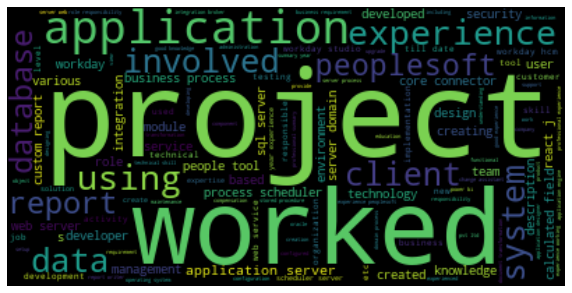

In [82]:
wc = WordCloud().generate(CleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [83]:
categories = np.sort(df['Category'].unique())

In [84]:
categories

array(['Peoplesoft resume', 'React JS Developer Resume',
       'SQL Developer Lighting Insight Resume', 'Workday resume'],
      dtype=object)

In [85]:
data_categories = [df[df['Category'] == Category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for Category in categories ]

In [86]:
data_categories

[                               Absolute_Clean_Resumes           Category
 24  murali professional summary year experience pe...  Peoplesoft resume
 25  peoplesoft admin varkala vikas career objectiv...  Peoplesoft resume
 26  peoplesoft administrator srinivask experience ...  Peoplesoft resume
 27  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resume
 28  tanna sujatha objective seeking challenging ro...  Peoplesoft resume
 29  r ahmed peoplesoft technical consultant profes...  Peoplesoft resume
 30  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft resume
 31  classification internal classification interna...  Peoplesoft resume
 32  hari narayana professional summary year experi...  Peoplesoft resume
 33  c n c address manyata tech park nagavara banga...  Peoplesoft resume
 34  peoplesoft administration vivekanand sayana ca...  Peoplesoft resume
 35  peoplesoft database administrator gangareddy p...  Peoplesoft resume
 36  anubhav kumar singh core competen

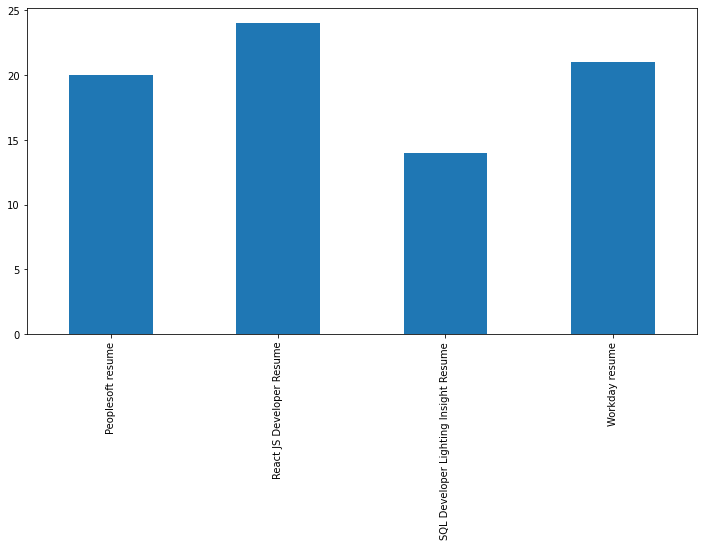

In [87]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.show()

In [88]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(height=2000, width=4000, colormap=WORDCLOUD_COLOR_MAP).generate(txt)
    
    return wordcloud

plot_palette = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(plot_palette)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])
    
    plt.subplot(5,5, i+1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()


In [90]:
from sklearn.preprocessing import LabelEncoder
var_mod =['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [91]:
df

,Category,Absolute_Clean_Resumes
0,1,naveen sadhu title software developer location...
1,1,uideveloper react j developer name krishna pro...
2,1,susovan bag seeking challenging position field...
3,1,shaik abdul sharuk years’ experience wipro car...
4,1,md khizaruddin rauf experience currently worki...
...,...,...
74,3,year experience workday hcm technical consulta...
75,3,jyoti verma professional summary professional ...
76,3,g himaja career objective work towards achievi...
77,3,name naresh babu cherukuri objective take resp...


In [92]:
df['Category'].head()

0    1
1    1
2    1
3    1
4    1
Name: Category, dtype: int32

In [93]:
df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

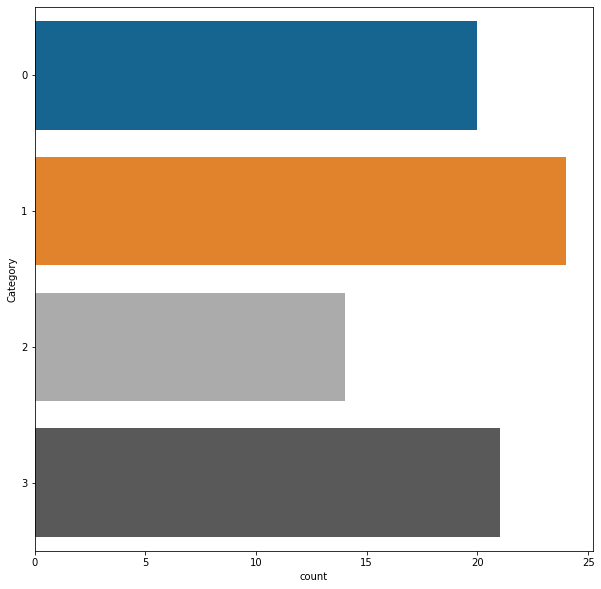

In [94]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y='Category', data=df)


In [95]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels = df['Category'].value_counts().reset_index()['index']

In [96]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [97]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

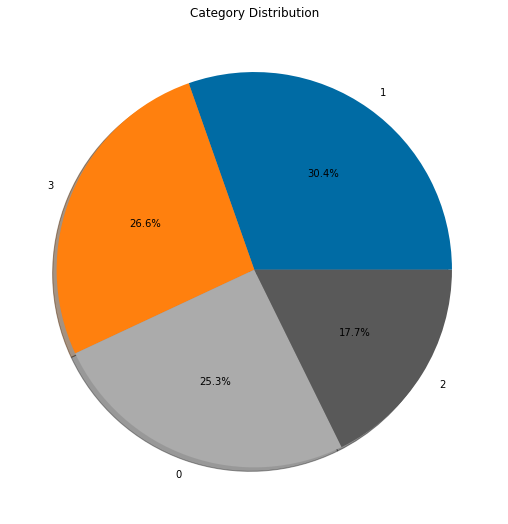

In [98]:
from matplotlib.gridspec import GridSpec
plt.figure(1,figsize=(20,20))
the_grid = GridSpec(2,2)
plt.subplot(the_grid[0,1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCounts, labels = targetLabels, autopct='%1.1f%%', shadow=True)

# TF-IDF

In [99]:
requiredText = df['Absolute_Clean_Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [100]:
requiredTarget

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# spliting the data train and test

In [101]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=12, test_size=0.20, stratify = requiredTarget)

In [102]:
X_train.shape, X_test.shape,

((63, 4266), (16, 4266))

In [103]:
y_train.shape, y_test.shape

((63,), (16,))

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

In [106]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 4.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# pip install lightgbm

# Support Vector Machine Classifier(SVC)

Linear Classifier

Linear Function

In [107]:
clf = SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [108]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [109]:
Y_pred_test = clf.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 2, 0])

In [110]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [111]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

0.9375

In [112]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



Non Linear classifier

ploynomial function

In [113]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [114]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [115]:
Y_pred_test = clf.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 2, 0])

In [116]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [117]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

0.9375

Radial kasis function

In [118]:
clf = SVC(kernel='rbf', gamma=1)
clf.fit(X_train,y_train)

SVC(gamma=1)

In [119]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [120]:
Y_pred_test = clf.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 2, 0])

In [121]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [122]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

0.9375

In [123]:
Train_cm1 = confusion_matrix(y_train, Y_pred_train)
Train_cm1

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [124]:
test_cm1 = confusion_matrix(y_test, Y_pred_test)
test_cm1

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

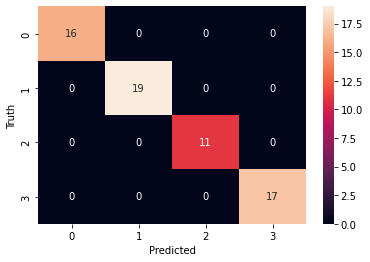

In [125]:
sns.heatmap(Train_cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Text(33.0, 0.5, 'Truth')

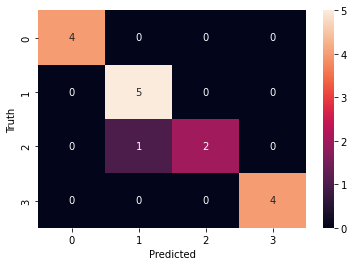

In [126]:
sns.heatmap(test_cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [127]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [128]:
accuracy_1 = round(accuracy_score(y_test,Y_pred_test),4)
precision_1 = round(precision_score(y_test,Y_pred_test,average='macro'),4)
recall_1 = round(recall_score(y_test,Y_pred_test,average='macro'),4)
f1_1 = round(f1_score(y_test,Y_pred_test,average='macro'),4)

In [129]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)


Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


# KNN Classifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [131]:
Y_pred_train = knn.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [132]:
Y_pred_test = knn.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 0])

In [133]:
train_Accuracy_2 = accuracy_score(y_train,Y_pred_train).round(3)
train_Accuracy_2

0.984

In [134]:
test_Accuracy_2 = accuracy_score(y_test,Y_pred_test).round(3)
test_Accuracy_2

1.0

In [135]:
train_cm2 = confusion_matrix(y_train,Y_pred_train)
train_cm2

array([[16,  0,  0,  0],
       [ 1, 18,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [136]:
test_cm2 = confusion_matrix(y_test,Y_pred_test)
test_cm2

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

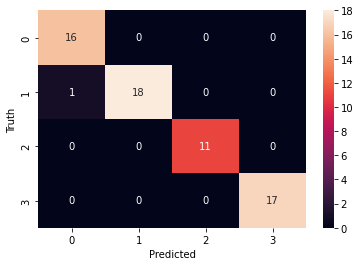

In [137]:
sns.heatmap(train_cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

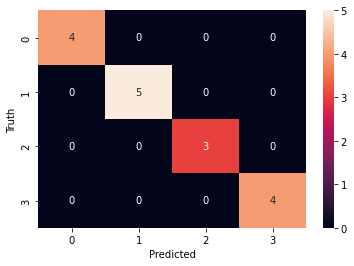

In [138]:
sns.heatmap(test_cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [139]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [140]:
accuracy_2 = round(accuracy_score(y_test,Y_pred_test),4)
precision_2 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_2 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_2 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# Naive-Bayes Classifier

In [141]:
NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [142]:
Y_pred_train = NB.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [143]:
Y_pred_test = NB.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 2, 0])

In [144]:
train_Accuracy_3 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_3

1.0

In [145]:
test_Accuracy_3 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_3

0.9375

In [146]:
train_cm3 = confusion_matrix(y_train, Y_pred_train)
train_cm3

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [147]:
test_cm3 = confusion_matrix(y_test, Y_pred_test)
test_cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

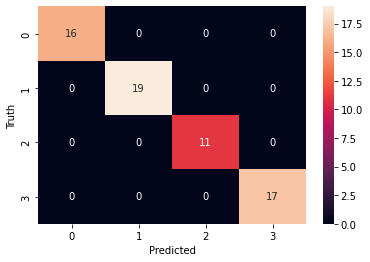

In [148]:
sns.heatmap(train_cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

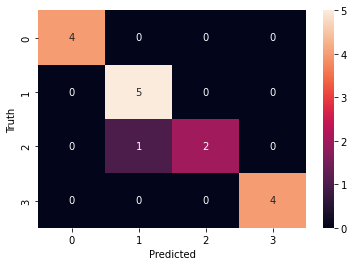

In [149]:
sns.heatmap(test_cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [150]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [151]:
from sklearn.metrics import log_loss

In [152]:
pred = NB.predict_proba(X_test)

In [153]:
log_loss(y_test, pred)

0.5741194546658863

In [154]:
accuracy_3 = round(accuracy_score(y_test,Y_pred_test),4)
precision_3 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_3 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_3 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


# Decision Tree Classifier

In [155]:
DTC = DecisionTreeClassifier(max_depth=2)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [156]:
Y_pred_train = DTC.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [157]:
Y_pred_test = DTC.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [158]:
DTC.tree_.max_depth

2

In [159]:
DTC.tree_.node_count

5

In [160]:
train_Accuracy_4 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_4

0.8253968253968254

In [161]:
test_Accuracy_4 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_4

0.8125

In [162]:
train_cm4 = confusion_matrix(y_train, Y_pred_train)
train_cm4

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [163]:
test_cm4 = confusion_matrix(y_test, Y_pred_test)
test_cm4

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

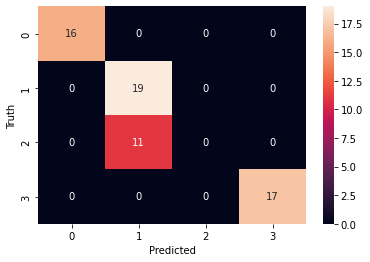

In [164]:
sns.heatmap(train_cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

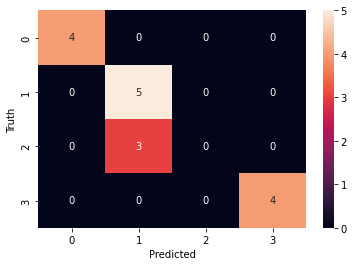

In [165]:
sns.heatmap(test_cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [166]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [167]:
accuracy_4 = round(accuracy_score(y_test,Y_pred_test),4)
precision_4 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_4 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_4 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923


# Random Forest Classifer

In [168]:
RFC = RandomForestClassifier(n_estimators=250,max_features=0.8,max_depth=2)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.8, n_estimators=250)

In [169]:
Y_pred_train = RFC.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [170]:
Y_pred_test = RFC.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 2, 0])

In [171]:
train_Accuracy_5 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_5

1.0

In [172]:
test_Accuracy_5 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_5

0.875

In [173]:
train_cm5 = confusion_matrix(y_train, Y_pred_train)
train_cm5

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [174]:
test_cm5 = confusion_matrix(y_test, Y_pred_test)
test_cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

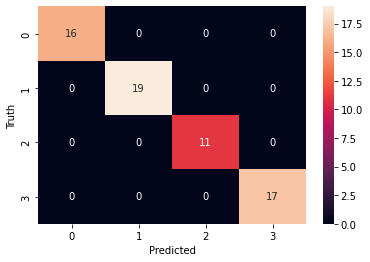

In [175]:
sns.heatmap(train_cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

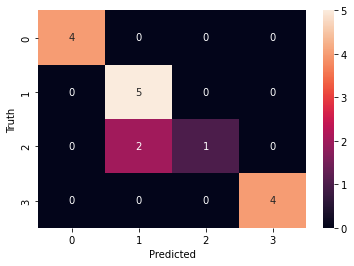

In [176]:
sns.heatmap(test_cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [177]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      0.85        16



In [178]:
accuracy_5 = round(accuracy_score(y_test,Y_pred_test),4)
precision_5 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_5 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_5 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8333
f1-Score        :  0.8333


# AdaBoost Classifier

In [179]:
adaboost = AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.0001)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=100, random_state=0)

In [180]:
Y_pred_train = adaboost.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [181]:
Y_pred_test = adaboost.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [182]:
train_Accuracy_6 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_6

0.8253968253968254

In [183]:
test_Accuracy_6 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_6

0.8125

In [184]:
train_cm6 = confusion_matrix(y_train,Y_pred_train)
train_cm6

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [185]:
test_cm6 = confusion_matrix(y_test,Y_pred_test)
test_cm6

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

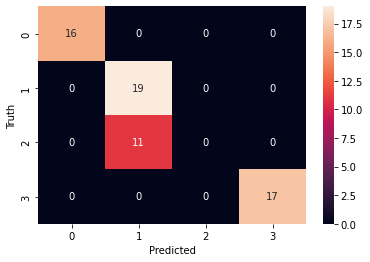

In [186]:
sns.heatmap(train_cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

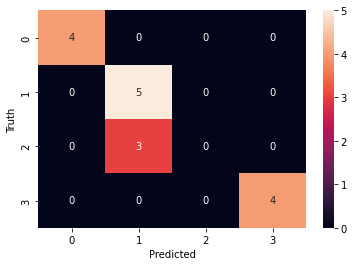

In [187]:
sns.heatmap(test_cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [188]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [189]:
accuracy_6 = round(accuracy_score(y_test,Y_pred_test),4)
precision_6 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_6 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_6 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923


# GradientBoosting Classifier

In [190]:
Gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,max_depth=2, random_state=0)
Gboost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, random_state=0)

In [191]:
Y_pred_train = Gboost.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [192]:
Y_pred_test = Gboost.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [193]:
train_Accuracy_7 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_7

0.8095238095238095

In [194]:
test_Accuracy_7 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_7

0.8125

In [195]:
train_cm7 = confusion_matrix(y_train,Y_pred_train)
train_cm7

array([[15,  1,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [196]:
test_cm7 = confusion_matrix(y_test,Y_pred_test)
test_cm7

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

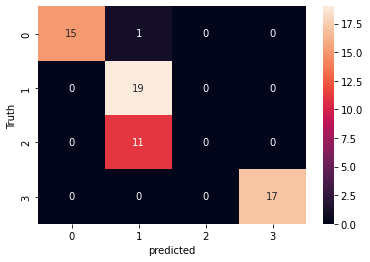

In [197]:
sns.heatmap(train_cm7,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

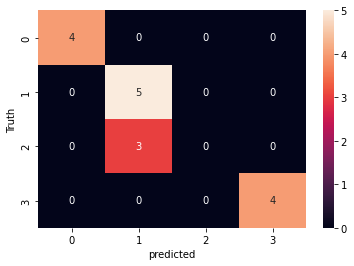

In [198]:
sns.heatmap(test_cm7,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [199]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [200]:
accuracy_7 = round(accuracy_score(y_test,Y_pred_test),4)
precision_7 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_7 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_7 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923


# XGBoost Classifier

In [201]:
XGboost = XGBClassifier(n_estimators=200, learning_rate=0.09,max_depth=3, random_state=0)
XGboost.fit(X_train,y_train)

NameError: name 'XGBClassifier' is not defined

In [202]:
Y_pred_train = XGboost.predict(X_train)
Y_pred_train

NameError: name 'XGboost' is not defined

In [203]:
Y_pred_test = XGboost.predict(X_test)
Y_pred_test

NameError: name 'XGboost' is not defined

In [ ]:
train_Accuracy_8 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_8

In [ ]:
test_Accuracy_8 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_8

In [ ]:
train_cm8 = confusion_matrix(y_train,Y_pred_train)
train_cm8

In [ ]:
test_cm8 = confusion_matrix(y_test,Y_pred_test)
test_cm8

In [ ]:
sns.heatmap(train_cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel('truth')

In [ ]:
sns.heatmap(test_cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

In [ ]:
accuracy_8 = round(accuracy_score(y_test,Y_pred_test),4)
precision_8 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_8 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_8 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

# LGBM-Boosting Classifier

In [ ]:
LGboost = LGBMClassifier()
LGboost.fit(X_train,y_train)

In [ ]:
Y_pred_train = LGboost.predict(X_train)
Y_pred_train

In [ ]:
Y_pred_test = LGboost.predict(X_test)
Y_pred_test

In [ ]:
train_Accuracy_9 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_9

In [ ]:
test_Accuracy_9 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_9

In [ ]:
train_cm9 = confusion_matrix(y_train,Y_pred_train)
train_cm9

In [ ]:
test_cm9 = confusion_matrix(y_test,Y_pred_test)
test_cm9

In [ ]:
sns.heatmap(train_cm9,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
sns.heatmap(test_cm9,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

In [ ]:
accuracy_9 = round(accuracy_score(y_test,Y_pred_test),4)
precision_9 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_9 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_9 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

In [ ]:
table = {'Classifier' : ['SVM Classifier','K-Nearest Neighbourhood Classifier','Naive-Bayes Classifier','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 
         'Training_Accuracy' : [train_Accuracy_1, train_Accuracy_2, train_Accuracy_3, train_Accuracy_4, train_Accuracy_5, train_Accuracy_6, train_Accuracy_7, train_Accuracy_8, train_Accuracy_9], 
         'Testing_Accuracy' : [test_Accuracy_1, test_Accuracy_2, test_Accuracy_3,test_Accuracy_4,test_Accuracy_5,test_Accuracy_6, test_Accuracy_7, test_Accuracy_8, test_Accuracy_9], 
         'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9], 
         'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 
         'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table

# convolutional neural networks Model(CNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# Define the model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(WordFeatures.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_2D = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)
cnn_model.fit(X_train_2D, y_train, epochs=100, batch_size=100)

In [ ]:
# Generate predictions on test data
X_test_2D = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)
cnn_pred = cnn_model.predict(X_test_2D)

# Print example predictions
for i in range(10):
    print('True label: {}, Predicted label: {}'.format(y_test[i], cnn_pred[i]))

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Calculate performance metrics
accuracy_cnn = accuracy_score(y_test, cnn_pred)
precision_cnn = precision_score(y_test, cnn_pred, average='weighted')
recall_cnn = recall_score(y_test, cnn_pred, average='weighted')
f1_cnn = f1_score(y_test, cnn_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1 score:", f1_cnn)

In [204]:
import pickle

# assume that the trained model is stored in a variable called "model"
with open('RFC.pickle', 'wb') as f:
    pickle.dump(RFC, f)